In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.ticker as mticker
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np


%matplotlib inline

In [ ]:
# Fetching MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)

# Get the data and target
X, y = mnist["data"], mnist["target"]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Split the train and test set
X_train, X_test, y_train, y_test = X[:10000], X[60000:], y[:10000], y[60000:]

In [ ]:
def train(leaf, tree, bootstrap_resampling):

  # Training on the existing dataset
  rf_clf = RandomForestClassifier(n_estimators = tree, criterion = "entropy",
                                  max_leaf_nodes = leaf, bootstrap = bootstrap_resampling)
  rf_clf.fit(X_train, y_train)


  # Evaluating the model
  pred_train = rf_clf.predict(X_train)
  pred_test = rf_clf.predict(X_test)

  zero_one_loss_train = 1-accuracy_score(y_train, pred_train)
  zero_one_loss_test = 1-accuracy_score(y_test, pred_test)

  pred_train_int = [int(pred) for pred in pred_train]
  pred_test_int = [int(pred) for pred in pred_test]
  y_train_int = [int(y) for y in y_train]
  y_test_int = [int(y) for y in y_test]


  squared_loss_train = mean_squared_error(y_train_int,pred_train_int, squared = False)
  squared_loss_test = mean_squared_error(y_test_int, pred_test_int, squared = False)

  return zero_one_loss_train, zero_one_loss_test, squared_loss_train, squared_loss_test


In [ ]:
def get_losses(bootstrap_resampling):
  results_zero_one_loss_train = []
  results_zero_one_loss_test = []
  results_squared_loss_train = []
  results_squared_loss_test = []
  trees = range(2,21)


  if bootstrap_resampling == True:
    # With bootstrap re-sampling
    leafs = range(100, 1600, 100)
    stop_trees = 1500
  else:
    # Without bootstrap re-sampling
    leafs = range(100, 2100, 100)
    stop_trees = 2000

  for leaf in leafs:
    zero_one_loss_train, zero_one_loss_test, squared_loss_train, squared_loss_test = train(leaf, 1, bootstrap_resampling)
    results_zero_one_loss_train.append(zero_one_loss_train)
    results_zero_one_loss_test.append(zero_one_loss_test)
    results_squared_loss_train.append(squared_loss_train)
    results_squared_loss_test.append(squared_loss_test)

    if(leaf == stop_trees):
      for tree in trees:
        zero_one_loss_train, zero_one_loss_test, squared_loss_train, squared_loss_test = train(leaf,tree, bootstrap_resampling)
        results_zero_one_loss_train.append(zero_one_loss_train)
        results_zero_one_loss_test.append(zero_one_loss_test)
        results_squared_loss_train.append(squared_loss_train)
        results_squared_loss_test.append(squared_loss_test)

  return results_zero_one_loss_train, results_zero_one_loss_test, results_squared_loss_train, results_squared_loss_test



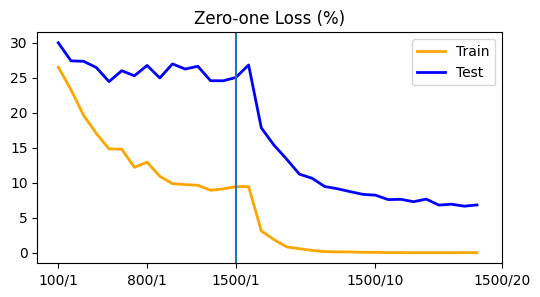

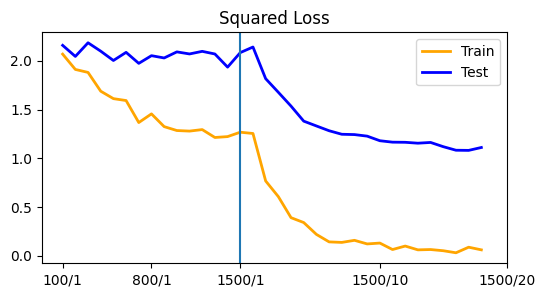

In [ ]:
# Printa i grafici quando c'è il boostrap resampling
results_zero_one_loss_train, results_zero_one_loss_test, results_squared_loss_train, results_squared_loss_test = get_losses(True)
labels = range(0,34)

# Prima immagine
plt.figure(figsize=(6,3))

plt.title("Zero-one Loss (%)")
plt.plot(labels, np.array(results_zero_one_loss_train)*100, linewidth=2.0, color = 'orange', label = "Train")
plt.plot(labels, np.array(results_zero_one_loss_test)*100, linewidth=2.0, color = 'blue', label = "Test")
plt.legend()
#plt.xticks(ticks = [1,5,10,20,25],visible=False)
#plt.text(1,-5,'100/1')
plt.xticks([0, 7, 14, 25, 35], ["100/1", "800/1", "1500/1", "1500/10", "1500/20"])

plt.axvline(x=14)

plt.show()

print()

plt.figure(figsize=(6,3))

plt.title("Squared Loss")
plt.plot(labels, results_squared_loss_train, linewidth=2.0, color = 'orange', label = "Train")
plt.plot(labels, results_squared_loss_test, linewidth=2.0, color = 'blue', label = "Test")
plt.legend()
plt.axvline(x=14)
plt.xticks([0, 7, 14, 25, 35], ["100/1", "800/1", "1500/1", "1500/10", "1500/20"])


plt.show()


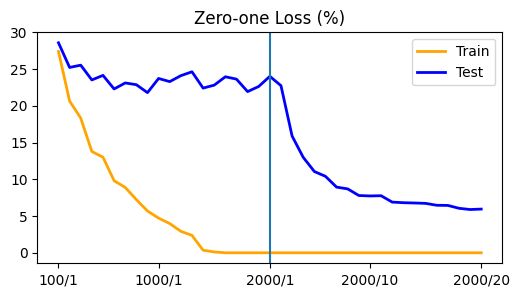

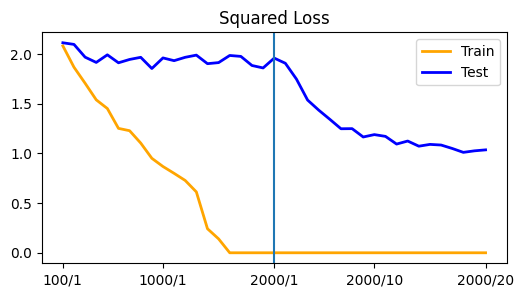

In [ ]:
# Printa i grafici quando non c'è il boostrap resampling
results_zero_one_loss_train, results_zero_one_loss_test, results_squared_loss_train, results_squared_loss_test = get_losses(False)
labels = range(0,39)

# Prima immagine
plt.figure(figsize=(6,3))

plt.title("Zero-one Loss (%)")
plt.plot(labels, np.array(results_zero_one_loss_train)*100, linewidth=2.0, color = 'orange', label = "Train")
plt.plot(labels, np.array(results_zero_one_loss_test)*100, linewidth=2.0, color = 'blue', label = "Test")
plt.legend()
#plt.xticks(ticks = [1,5,10,20,25],visible=False)
#plt.text(1,-5,'100/1')
plt.xticks([0, 9, 19, 28, 38], ["100/1", "1000/1", "2000/1", "2000/10", "2000/20"])

plt.axvline(x=19)

plt.show()

plt.figure(figsize=(6,3))

plt.title("Squared Loss")
plt.plot(labels, results_squared_loss_train, linewidth=2.0, color = 'orange', label = "Train")
plt.plot(labels, results_squared_loss_test, linewidth=2.0, color = 'blue', label = "Test")
plt.legend()
plt.axvline(x=19)
plt.xticks([0, 9, 19, 28, 38], ["100/1", "1000/1", "2000/1", "2000/10", "2000/20"])


plt.show()
